# Ch02 Basic Constructions

<div id="toc"></div>

## 2.1 If Tests, Colon and Indentation

## 2.2 Functions

In [ ]:
# %load py/ball_function.py
def y(t):
    v0 = 5                    # Initial velocity
    g = 9.81                  # Acceleration of gravity
    return v0*t - 0.5*g*t**2

time = 0.6       # Just pick one point in time
print(y(time))
time = 0.9       # Pick another point in time
print(y(time))


In [3]:
%run py/ball_function.py

1.2342
0.5269499999999994


In [ ]:
# %load py/ball_position_xy.py
def y(v0y, t):
    g = 9.81                  # Acceleration of gravity
    return v0y*t - 0.5*g*t**2

def x(v0x, t):
    return v0x*t

initial_velocity_x = 2.0
initial_velocity_y = 5.0

time = 0.6       # Just pick one point in time
print(x(initial_velocity_x, time), y(initial_velocity_y, time))

time = 0.9       # ... Pick another point in time
print(x(initial_velocity_x, time), y(initial_velocity_y, time))

In [6]:
%run py/ball_position_xy.py

1.2 1.2342
1.8 0.5269499999999994


In [ ]:
# %load py/function_as_argument.py
def sum_xy(x, y):
    return x + y

def prod_xy(x, y):
    return x*y

def treat_xy(f, x, y):
    return f(x, y)

x = 2;  y = 3

print(treat_xy(sum_xy, x, y))
print(treat_xy(prod_xy, x, y))

In [9]:
%run py/function_as_argument.py

5
6


## 2.3 For Loops

In [ ]:
# %load py/ball_max_height.py
import matplotlib.pyplot as plt
import numpy as np

v0 = 5                    # Initial velocity
g = 9.81                  # Acceleration of gravity
t = np.linspace(0, 1, 1000)  # 1000 points in time interval
y = v0*t - 0.5*g*t**2     # Generate all heights

# At this point, the array y with all the heights is ready.
# Now we need to find the largest value within y.

largest_height = y[0]          # Starting value for search
for i in range(1, 1000):
    if y[i] > largest_height:
        largest_height = y[i]

print("The largest height achieved was %f m" % (largest_height))

# We might also like to plot the path again just to compare
plt.plot(t,y)
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')


In [14]:
%run py/ball_max_height.py

The largest height achieved was 1.274210 m


## 2.4 While Loops

In [ ]:
# %load py/ball_time.py
from numpy import linspace

v0 = 4.5                  # Initial velocity
g = 9.81                  # Acceleration of gravity
t = linspace(0, 1, 1000)  # 1000 points in time interval
y = v0*t - 0.5*g*t**2     # Generate all heights

# Find where the ball hits y=0
i = 0
while y[i] >= 0:
    i += 1

# Now, y[i-1]>0 and y[i]<0 so let's take the middle point
# in time as the approximation for when the ball hits h=0
print("y=0 at", 0.5*(t[i-1] + t[i]))

# We plot the path again just for comparison
import matplotlib.pyplot as plt
plt.plot(t, y)
plt.plot(t, 0*t, 'g--')
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.show()


y=0 at 0.917417417417


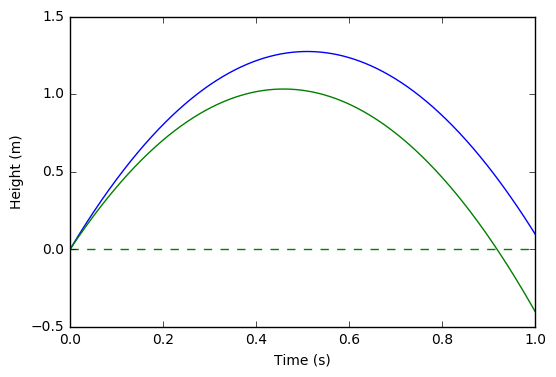

In [17]:
%run py/ball_time.py

## 2.5 Lists and Tuples – Alternatives to Arrays

In [23]:
x = ['hello' , 4, 3.14, 6]

In [24]:
x = ['hello' , 4, 3.14, 6]
x.insert(0, -2) # x then becomes [-2, ’hello’, 4, 3.14, 6]
del x[3]        # x then becomes [-2, ’hello’, 4, 6]
x.append(3.14)  # x then becomes [-2, ’hello’, 4, 6, 3.14]

In [25]:
x = ['hello' , 4, 3.14, 6]
for e in x:
    print('x element: ' , e)
print('This was all the elements in the list x')

x element:  hello
x element:  4
x element:  3.14
x element:  6
This was all the elements in the list x


In [28]:
List_1 = [1, 2, 3, 4]
List_1

[1, 2, 3, 4]

In [29]:
List_2 = [e*10 for e in List_1]
List_2

[10, 20, 30, 40]

In [ ]:
List_2 = [E(e) for e in List_1]
List_2

In [33]:
x = ('hello' , 4, 3.14, 6)
for e in x:
    print('x element: ' , e)
print('This was all the elements in the tuple x')

x element:  hello
x element:  4
x element:  3.14
x element:  6
This was all the elements in the tuple x


## 2.6 Reading from and Writing to Files

In [ ]:
# %load py/file_handling.py
filename = 'tmp.dat'
infile = open(filename, 'r')  # Open file for reading
line = infile.readline()      # Read first line
# Read x and y coordinates from the file and store in lists
x = []
y = []
for line in infile:
    words = line.split()      # Split line into words
    x.append(float(words[0]))
    y.append(float(words[1]))
infile.close()

# Transform y coordinates
from math import log

def f(y):
    return log(y)

for i in range(len(y)):
    y[i] = f(y[i])

# Write out x and y to a two-column file
filename = 'tmp_out.dat'
outfile = open(filename, 'w')  # Open file for writing
outfile.write('# x and y coordinates\n')
for xi, yi in zip(x, y):
    outfile.write('%10.5f %10.5f\n' % (xi, yi))
outfile.close()



In [ ]:
%run py/file_handling.py

In [ ]:
# %load py/file_handling_numpy.py
filename = 'tmp.dat'
import numpy
data = numpy.loadtxt(filename, comments='#')
x = data[:,0]
y = data[:,1]
data[:,1] = numpy.log(y)  # insert transformed y back in array
filename = 'tmp_out.dat'
filename = 'tmp_out.dat'
outfile = open(filename, 'w')  # open file for writing
outfile.write('# x and y coordinates\n')
numpy.savetxt(outfile, data, fmt='%10.5f')



In [ ]:
%run py/file_handling_numpy.py

## 2.7 Exercises

### Exercise 2.1: Errors with colon, indent, etc.  

### Exercise 2.2: Compare integers a and b  

In [1]:
a = input('Give an integer a: ')
b = input('Give an integer b: ')

if a < b:
    print "a is the smallest of the two numbers"
elif a == b:
    print "a and b are equal"
else:
    print "a is the largest of the two numbers"

Give an integer a: 10
Give an integer b: 2
a is the largest of the two numbers


### Exercise 2.3: Functions for circumference and area of acircle  

In [ ]:
from math import *

def circumference(r):
    return 2*pi*r
def area(r):
    return pi*r**2

r = input('Give the radius of a circle: ')
C = circumference(r)
A = area(r)
print "Circumference: %g , Area: %g" % (C, A)

### Exercise 2.4: Function for area of arectangle  

In [ ]:
def area(s1, s2):
    return s1*s2

b = input('Give the one side of the rectangle: ')
c = input('Give the other side of the rectangle: ')
print "Area: ", area(b, c)

### Exercise 2.5: Area of apolygon  

In [ ]:
"""
Computes the area of a polygon from vertex
coordinates only.
"""

def polyarea(x, y):
    n = len(x)
    # next we may initialize area with those terms in the
    # sum that does not follow the "increasing index pattern"
    area = x[n-1]*y[0] - y[n-1]*x[0]
    for i in range(0,n-1,1):
        area += x[i]*y[i+1] - y[i]*x[i+1]
    return 0.5*abs(area)

In [ ]:
# pentagon
x = [0, 2, 2, 1, 0]
y = [0, 0, 2, 3, 2]
print 'Area pentagon (true value = 5): ', polyarea(x, y)
# quadrilateral
x = [0, 2, 2, 0]
y = [0, 0, 2, 2]
print 'Area quadrilateral (true value = 4): ', polyarea(x, y)
# triangle
x = [0, 2, 0]
y = [0, 0, 2]
print 'Area triangle (true value = 2): ', polyarea(x, y)

### Exercise 2.6: Average of integers  

In [ ]:
def average(N):
    sum = 0
    for i in range(1, N+1):    # Note: Must use `N+1` to get `N`
        sum += i
    return sum/float(N)

N = input('Give an integer > 1: ')
average_1_to_N = average(N)
print "The average of 1,..., %d is: %g" % (N, average_1_to_N)

### Exercise 2.7: While loop with errors  

In [1]:
some_number = 0
i = 1
while i < 11
    some_number += 1
print some_number

SyntaxError: invalid syntax (<ipython-input-1-04eb2322b336>, line 3)

In [3]:
some_number = 0;
i = 1
while i < 11:
    some_number += i
    i += 1
print some_number

55


### Exercise 2.8: Area of rectangle versus circle  

In [4]:
from math import *

r = 10.6
a = 1.3    # one side of rectangle
circle_area = pi*r**2

b = 0      # chosen starting value for other side of rectangle
while a*b < circle_area:
    b += 1
b -= 1     # must reverse the last update to get the right value
print "The largest possible value of b: ", b

The largest possible value of b:  271


### Exercise 19: Find crossing points of two graphs

### Exercise 2.9: Find crossing points of two graphs  

In [ ]:
from numpy import *

def f(x):
    return x

def g(x):
    return x**2

N = input('Give the number of check points N: ')
epsilon = input('Give the error tolerance: ')
x_values = linspace(-4, 4, N)

# Next, we run over all indices in the array `x_values` and
# check if the difference between function values is smaller than
# the chosen limit

for i in range(N):
    if abs(f(x_values[i]) - g(x_values[i])) < epsilon:
        print x_values[i]

### Exercise 2.10: Sort array with numbers  

In [ ]:
from numpy import zeros
from random import uniform

N = 6
numbers = zeros(N)

# Draw random numbers
for i in range(len(numbers)):
    numbers[i] = uniform(0, 10)
print "Unsorted: %5.3f  %5.3f %5.3f %5.3f  %5.3f %5.3f" % \
        (numbers[0], numbers[1], numbers[2],\
         numbers[3], numbers[4], numbers[5])

for reference in range(N):
    smallest = numbers[reference]
    i_smallest = reference
    # Find the smallest number in remaining unprinted array
    for i in range(reference + 1, N, 1):
        if numbers[i] <= smallest:
            smallest = numbers[i]
            i_smallest = i
    # Switch numbers, and use an extra variable for that
    switch = numbers[reference]
    numbers[reference] = numbers[i_smallest]
    numbers[i_smallest] = switch

print "Sorted  : %5.3f  %5.3f %5.3f %5.3f  %5.3f %5.3f" % \
        (numbers[0], numbers[1], numbers[2],\
         numbers[3], numbers[4], numbers[5])

### Exercise 2.11: Compute  pi

In [7]:
from numpy import pi, zeros, sqrt

no_of_terms = input('Give number of terms in sum for pi: ')
Leibniz_error = zeros(no_of_terms)
Euler_error = zeros(no_of_terms)

#Leibniz
sum1 = 0
for k in range(0, no_of_terms):
    sum1 += 1.0/((4*k + 1)*(4*k + 3))
    Leibniz_error[k] = pi - 8*sum1
sum1 *= 8
final_Leibniz_error = abs(pi - sum1)
print "Leibniz: ", final_Leibniz_error

# Euler
sum2 = 0
for k in range(1, no_of_terms+1):  # Note index range
    sum2 += 1.0/k**2
    Euler_error[k-1] = pi - sqrt(6*sum2)
sum2 *= 6
sum2 = sqrt(sum2)
final_Euler_error = abs(pi - sum2)
print "Euler: ", final_Euler_error

import matplotlib.pyplot as plt
plt.plot(range(no_of_terms), Leibniz_error, 'b-',\
         range(no_of_terms), Euler_error, 'r-')
plt.xlabel('No of terms')
plt.ylabel('Error with Leibniz (blue) and Euler (red)')
plt.show()

Give number of terms in sum for pi: 20
Leibniz:  0.024996096796
Euler:  0.0469231294761


### Exercise 2.12: Compute combinations of sets  

In [8]:
ranks = ['A', '2', '3', '4', '5', '6', '7',
         '8', '9', '10', 'J', 'Q', 'K']
suits = ['C', 'D', 'H', 'S']
deck = []
for s in suits:
    for r in ranks:
        deck.append(s + r)
print deck

['CA', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'CJ', 'CQ', 'CK', 'DA', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'DJ', 'DQ', 'DK', 'HA', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'HJ', 'HQ', 'HK', 'SA', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'SJ', 'SQ', 'SK']


In [ ]:
import string
letters = string.ascii_uppercase
digits = range(10)
registration_numbers = []
for place1 in letters:
    for place2 in letters:
        for place3 in digits:
            for place4 in digits:
                for place5 in digits:
                    registration_numbers.append(
                        '%s%s%s%s%s' %
                        (place1, place2, place3, place4, place5))
print registration_numbers

### Exercise 2.13: Frequency of random numbers  

In [10]:
from random import randint

N = input('How many random numbers should be drawn? ')

# Draw random numbers
M = 0   # Counter for the occurences of 6
for i in range(N):
    drawn_number = randint(1, 6)
    print 'Draw number %d gave: %d' % (i+1, drawn_number)
    if drawn_number == 6:
        M += 1

print 'The fraction M/N became: %g' % (M/float(N))

How many random numbers should be drawn? 10
Draw number 1 gave: 4
Draw number 2 gave: 3
Draw number 3 gave: 6
Draw number 4 gave: 1
Draw number 5 gave: 5
Draw number 6 gave: 5
Draw number 7 gave: 1
Draw number 8 gave: 1
Draw number 9 gave: 5
Draw number 10 gave: 1
The fraction M/N became: 0.1


### Exercise 2.14: Game21  

In [11]:
from random import randint

upper_limit = 21
not_finished = True
sum = 0
while not_finished:
    next_number = randint(0, 10)
    print "You got: ", next_number
    sum += next_number
    if sum > upper_limit:
        print "Game over, you passed 21 (with your %d points)!"\
                % sum
        not_finished = False
    else:
        print "Your score is now: %d points!" % (sum)
        answer = raw_input('Another draw (y/n)? ')
        if answer != 'y':
            not_finished = False
print "Finished!"

You got:  8
Your score is now: 8 points!
Another draw (y/n)? y
You got:  1
Your score is now: 9 points!
Another draw (y/n)? y
You got:  0
Your score is now: 9 points!
Another draw (y/n)? y
You got:  1
Your score is now: 10 points!
Another draw (y/n)? y
You got:  4
Your score is now: 14 points!
Another draw (y/n)? y
You got:  10
Game over, you passed 21 (with your 24 points)!
Finished!


### Exercise 2.15: Linear interpolation  

In [14]:
from numpy import zeros

def interpolate(y, t):
    """Uses linear interpolation to find intermediate y"""
    i = int(t)
    # Scheme: y(t) = y_i + delta-y/delta-t * dt
    return y[i] + ((y[i+1] - y[i])/delta_t)*(t-i)

def find_y():
    """Repeatedly finds y at t by interpolation"""
    print 'For time t on the interval [0,%d]...' % (N)
    t = input('Give your desired t > 0: ')
    while t >= 0:
        print 'y(t) = %g' % (interpolate(y, t))
        t = input('Give new time t (to stop, enter t < 0): ')

# Note: do not need to store the sequence of times
N = 4            # Total number of measurements
delta_t = 1.0    # Time difference between measurements

y = zeros(5)
y[0] = 4.4; y[1] = 2.0; y[2] = 11.0;
y[3] = 21.5; y[4] = 7.5

find_y()

For time t on the interval [0,4]...
Give your desired t > 0: 2
y(t) = 11
Give new time t (to stop, enter t < 0): -2


### Exercise 2.16: Test straight line requirement  

In [ ]:
"""
For a straight line f(x) = ax + b, and the fixed point (2,f(2)) on
the line, the script tests whether (f(x_i) - f(2)) / (x_i - 2) = a
for randomly chosen x_i, i = 1,...,100.
"""

from random import random

def f(x):
    return a*x + b

a = 4.0; b = 1.0
c = 2; f_c = f(c)  # Fixed point on the line
epsilon = 1e-6
i = 0
for i in range(100):
    x = 10*random()   # random() returns number between 0 and 1
    numerator = f(x) - f_c
    denominator = x - c
    if denominator > epsilon:   # To avoid zero division
        fraction = numerator/denominator
        # The following printout should be very close to zero in
        # each case if the points are on the line
        print 'For x = %g : %g' % (x,abs(fraction - a))

### Exercise 2.17: Fit straight line to data  

In [ ]:
from numpy import array
import matplotlib.pyplot as plt

def f(t,a,b):
    return a*t + b

def find_error(a, b):
    E = 0
    for i in range(len(time)):
        E += (f(time[i],a,b) - data[i])**2
    return E

def interactive_line_fit():
    one_more = True
    while one_more:
        a = input('Give a: ')
        b = input('Give b: ')
        print 'The error is: %g' % (find_error(a, b))
        y = f(time, a, b)
        plt.plot(time, y, time, data, '*')
        plt.xlabel('Time (s)')
        plt.ylabel('y (stars) and straight line f(t)')
        plt.show()
        answer = raw_input('Do you want another fit (y/n)? ')
        if answer == "n":
            one_more = False

data = array([0.5, 2.0, 1.0, 1.5, 7.5])
time = array([0, 1, 2, 3, 4])

interactive_line_fit()

Give a: 1
Give b: 0
The error is: 16.75


### Exercise 2.18: Fit sines to straightline  

In [ ]:
from numpy import zeros, linspace, sin, sqrt, pi, copy, arange
import matplotlib.pyplot as plt

def sinesum(t, b):
    """
    Computes S as the sum over n of b_n * sin(n*t).
    For each point in time (M) we loop over all b_n to
    produce one element S[M], i.e. one element in
    S corresponds to one point in time.
    """
    S = zeros(len(t))
    for M in range(0, len(t), 1):
        for n in range(1, len(b)+1, 1):
            S[M] += b[n-1]*sin(n*t[M])
    return S

def test_sinesum():
    t = zeros(2); t[0] = -pi/2;  t[1] = pi/4
    b = zeros(2); b[0] = 4.0;  b[1] = -3
    print sinesum(t, b)

def plot_compare(f, N, M):
    time = linspace(left_end, right_end, M)
    y = f(time)
    S = sinesum(time, b)
    plt.plot(time, y, 'b-', time, S, 'r--')
    plt.xlabel('Time')
    plt.ylabel('f (blue) and S (red)')
    plt.show()

def error(b, f, M):
    time = linspace(left_end, right_end, M)
    y = f(time)
    S = sinesum(time, b)
    E = 0
    for i in range(len(time)):
        E += sqrt((y[i] - S[i])**2)
    return E

def trial(f, N):
    M = 500
    new_trial = True
    while new_trial:
        for i in range(N):
            text = 'Give b' + str(i+1) + ' : '
            b[i] = input(text)
        plot_compare(f, N, M)
        print 'The error is: ', error(b, f, M)
        answer = raw_input('Another trial (y/n)? ')
        if answer == 'n':
            new_trial = False

def f(t):
    return (1/pi)*t

def automatic_fit(f, N):
    """Search for b-values, - just pick limits and step"""
    global b
    M = 500
    # Produce and store an initially "smallest" error
    b[0] = -1; b[1] = -1; b[2] = -1
    test_b = copy(b)
    smallest_E = error(test_b, f, M)
    db = 0.1
    for b1 in arange(-1, 1+db, db):
        for b2 in arange(-1, 1+db, db):
            for b3 in arange(-1, 1+db, db):
                test_b[0] = b1; test_b[1] = b2;
                test_b[2] = b3
                E = error(test_b, f, M)
                if E < smallest_E:
                    b = copy(test_b)
                    smallest_E = E
    plot_compare(f, N, M)
    print 'The b coeffiecients: ', b
    print 'The smallest error found: ', smallest_E

left_end = -pi;  right_end = pi
N = 3
b = zeros(N)
#test_sinesum()
#trial(f, N)
automatic_fit(f, N)

### Exercise 2.19: Count occurrences of a string in a string

In [ ]:
gene = 'AGTCAATGGAATAGGCCAAGCGAATATTTGGGCTACCA'

def freq(letter, text):
    counter = 0
    for i in text:
        if i == letter:
            counter += 1
    return counter/float(len(text))

def pairs(letter, text):
    counter = 0
    for i in range(len(text)):
        if i < len(text)-1 and \
               text[i] == letter and text[i+1] == letter:
            counter += 1
    return counter

def mystruct(text):
    counter = 0
    for i in range(len(text)):
        # Search for the structure from position i
        if text[i] == 'G':
            print 'found G at', i
            # Search among A and T letters
            j = i + 1
            while text[j] == 'A' or text[j] == 'T':
                print 'next is ok:', text[j]
                j = j + 1
            print 'ending is', text[j:j+2]
            if text[j:j+2] == 'GG':
                # Correct ending of structure
                counter += 1
                print 'yes'
    return counter

print 'frequency of C: %.1f' % freq('C', gene)
print 'frequency of G: %.1f' % freq('G', gene)
print 'no of pairs AA: %d' % pairs('A', gene)
print 'no of structures: %d' % mystruct(gene)